<b>1. Загрузить данные. Привести столбец с датой, в формат datetime.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from prophet import Prophet
import numpy as np

df = pd.read_csv('co2-ppm-daily.csv')
df.head(10)

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09
5,1958-04-05,317.38
6,1958-04-06,317.80
7,1958-04-08,316.81
8,1958-04-10,316.56
9,1958-04-11,316.84


In [2]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18764 entries, 0 to 18763
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18764 non-null  datetime64[ns]
 1   value   18764 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 293.3 KB


<b>2. Визуализировать данные при помощи Matplotlib и Plotly. Посмотреть есть ли какая-нибудь зависимость в наборе данных.

In [3]:
fig = px.line(data_frame=df, x='date', y='value', title='Временной ряд выбросов углекислого газа')
fig.show()

Можно увидеть зависимость, показывающую увеличение кол-ва выбросов углекислого газа в зависимости от времени

<b>3. Построить прогноз возможных выбросов СО2 в атмосферу на ближайшие 2 года. Используем библиотеку Prophet.

In [22]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
model = Prophet()
model.fit(df.rename(columns={'date': 'ds', 'value': 'y'}))

future = model.make_future_dataframe(periods=365*7)
forecast = model.predict(future)

forecast

19:07:23 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1958-03-30,314.860405,316.061791,317.736524,314.860405,314.860405,2.000297,2.000297,2.000297,0.003126,0.003126,0.003126,1.997171,1.997171,1.997171,0.0,0.0,0.0,316.860703
1,1958-03-31,314.862829,316.011066,317.746543,314.862829,314.862829,2.028770,2.028770,2.028770,-0.011779,-0.011779,-0.011779,2.040549,2.040549,2.040549,0.0,0.0,0.0,316.891599
2,1958-04-02,314.867675,316.144074,317.849499,314.867675,314.867675,2.129486,2.129486,2.129486,0.001913,0.001913,0.001913,2.127573,2.127573,2.127573,0.0,0.0,0.0,316.997161
3,1958-04-03,314.870099,316.239090,317.864872,314.870099,314.870099,2.173465,2.173465,2.173465,0.002516,0.002516,0.002516,2.170950,2.170950,2.170950,0.0,0.0,0.0,317.043564
4,1958-04-04,314.872522,316.227457,317.907888,314.872522,314.872522,2.218139,2.218139,2.218139,0.004096,0.004096,0.004096,2.214043,2.214043,2.214043,0.0,0.0,0.0,317.090661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21314,2024-12-25,422.409066,415.834682,428.982859,416.383430,429.559677,-0.494368,-0.494368,-0.494368,0.001913,0.001913,0.001913,-0.496281,-0.496281,-0.496281,0.0,0.0,0.0,421.914698
21315,2024-12-26,422.415181,415.876574,429.204038,416.385972,429.570641,-0.460378,-0.460378,-0.460378,0.002516,0.002516,0.002516,-0.462893,-0.462893,-0.462893,0.0,0.0,0.0,421.954803
21316,2024-12-27,422.421296,415.895704,429.143680,416.388513,429.581605,-0.426093,-0.426093,-0.426093,0.004096,0.004096,0.004096,-0.430189,-0.430189,-0.430189,0.0,0.0,0.0,421.995203
21317,2024-12-28,422.427411,416.082163,429.170890,416.390529,429.592568,-0.403578,-0.403578,-0.403578,-0.005362,-0.005362,-0.005362,-0.398216,-0.398216,-0.398216,0.0,0.0,0.0,422.023833


<b>4. Визуализировать новые данные с учетом прогноза при помощи Matplotlib и Plotly.



c:\Users\tsukerin\Desktop\storage\projects\work\simeon\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\tsukerin\Desktop\storage\projects\work\simeon\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



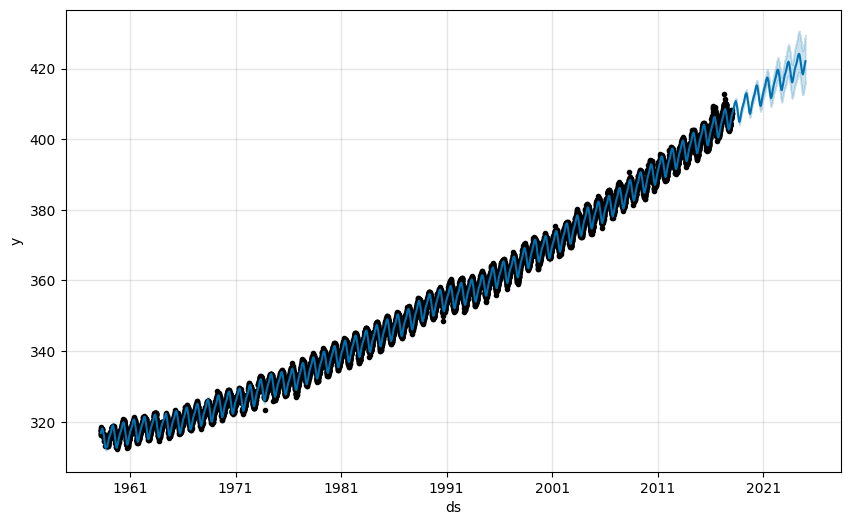

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
plt.show()

<b>5. Построить графики прогноза за неделю и год.

Неделя

c:\Users\tsukerin\Desktop\storage\projects\work\simeon\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\tsukerin\Desktop\storage\projects\work\simeon\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



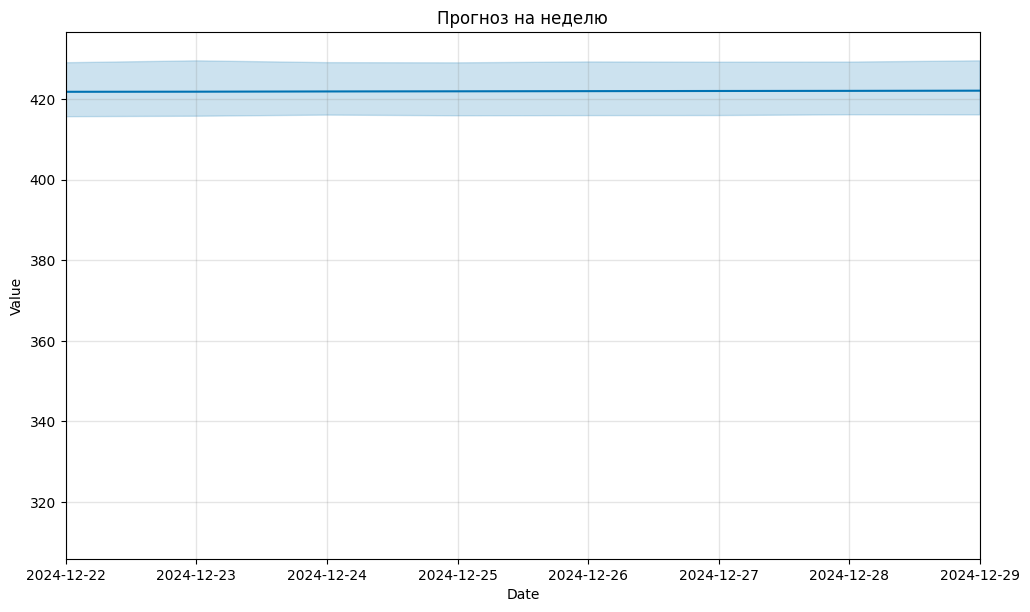

In [24]:
fig = model.plot(forecast, xlabel='Date', ylabel='Value', figsize=(10, 6))
plt.xlim(forecast['ds'].max() - pd.Timedelta(days=7), forecast['ds'].max()) 
plt.title('Прогноз на неделю')
plt.show()

Год

c:\Users\tsukerin\Desktop\storage\projects\work\simeon\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\tsukerin\Desktop\storage\projects\work\simeon\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



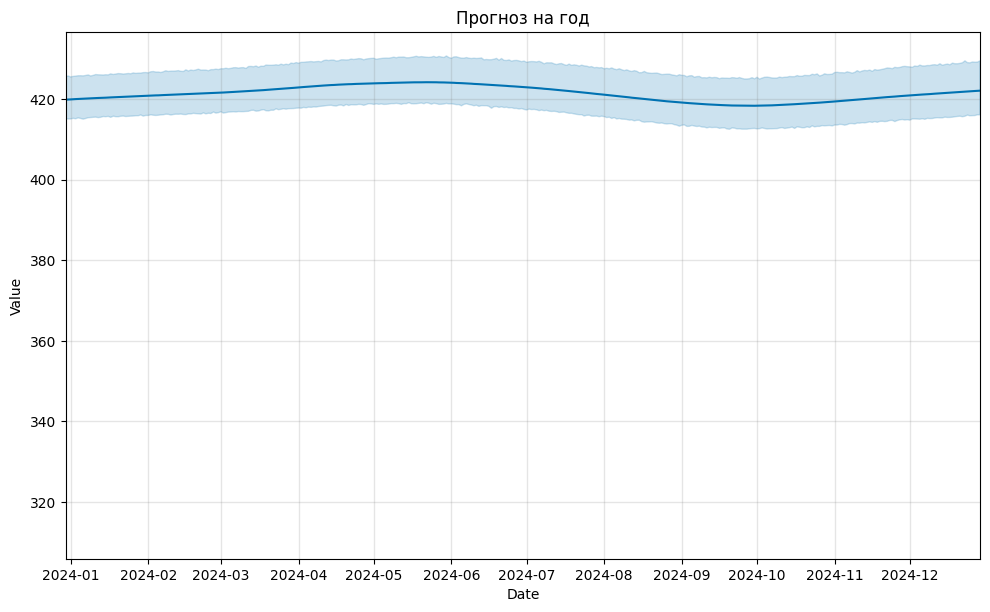

In [25]:
fig = model.plot(forecast, xlabel='Date', ylabel='Value', figsize=(10, 6))
plt.xlim(forecast['ds'].max() - pd.Timedelta(days=365), forecast['ds'].max()) 
plt.title('Прогноз на год')
plt.show()

6. Построить прогноз возможных выбросов СО2 в атмосферу на ближайшие 2 года. Используем модели случайного леса и регрессии.

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df['year'] = forecast['ds'].dt.year
df['month'] = forecast['ds'].dt.month
df['day'] = forecast['ds'].dt.day

# Подготовка данных
X = df[['year', 'month', 'day']]
y = df['value']

# Тренировка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Вывод MSE
print(f'Средняя квадратичная ошибка методом случайного леса: {rf_mse}')
print(f'Средняя квадратичная ошибка линейной регрессии: {lr_mse}')

Средняя квадратичная ошибка методом случайного леса: 0.22523201690647487
Средняя квадратичная ошибка линейной регрессии: 13.999110658911304


In [20]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

future_dates = pd.date_range(start='2024-05-15', periods=365*2, freq='D') 
future = pd.DataFrame({
    'year': future_dates.year,
    'month': future_dates.month,
    'day': future_dates.day
})

rf_future_pred = rf_model.predict(future)
lr_future_pred = lr_model.predict(future)

future['rf_predicted_CO2'] = rf_future_pred
future['lr_predicted_CO2'] = lr_future_pred

# Прогноз показателей выбросов углекислого газа на 2 года
future.head(10)

,year,month,day,rf_predicted_CO2,lr_predicted_CO2
0,2024,5,15,410.5460,409.762025
1,2024,5,16,410.6850,409.767435
2,2024,5,17,410.0974,409.772846
3,2024,5,18,410.1374,409.778256
4,2024,5,19,410.1085,409.783667
5,2024,5,20,409.9533,409.789077
6,2024,5,21,409.9652,409.794488
7,2024,5,22,410.0211,409.799898
8,2024,5,23,410.0166,409.805309
9,2024,5,24,410.0804,409.810719


In [21]:
px.line(data_frame=future, x=future_dates, y='rf_predicted_CO2', title='Random Forest predict').show()
px.line(data_frame=future, x=future_dates, y='lr_predicted_CO2', title='Linear Regression predict').show()

Вывод: Модель случайного леса (Random Forest) показала себя значительно более точной (MSE = ~0.22) для прогнозирования выбросов углекислого газа на ближайшие два года по сравнению с линейной регрессией (MSE = ~14).